It's better to perform Principal Component Analysis (PCA) on the percentage change (or returns) of financial data rather than on the raw prices because of the statistical properties of the data. The key reasons are stationarity, scale, and interpretability.


Stationarity
Raw financial data, like stock prices, are typically non-stationary. This means their statistical properties, such as the mean and variance, change over time. Stock prices have a clear upward trend, and the magnitude of their fluctuations tends to increase as the price level increases. When we apply PCA to non-stationary data, the first principal component often just captures this dominant trend, which isn't very useful for understanding the relationships between different assets.

In contrast, the percentage change (or returns) of financial data is generally stationary. The daily return of a stock tends to have a relatively stable mean (close to zero) and variance over time. By using returns, we remove the non-stationary trend and focus on the short-term fluctuations and co-movements of the assets, which is where the most valuable information for analysis and modeling lies.

Scale
Raw prices of different financial assets can vary dramatically. For example, a share of a blue-chip company might be worth thousands of dollars, while a penny stock is worth just a few cents. Since PCA is based on variance, it is highly sensitive to the scale of the data. A raw price series with a large magnitude and high variance can disproportionately dominate the principal components, regardless of its underlying importance.

By converting to percentage change, we effectively standardize the data, placing all assets on a comparable scale. This ensures that the PCA algorithm correctly identifies the components that explain the most collective variance across all assets, rather than simply being skewed by the asset with the highest price or largest absolute change.

Interpretability
The principal components derived from returns have a more meaningful financial interpretation. The first principal component (PC1) of stock returns, for instance, often represents the overall market movement (e.g., the S&P 500 or market beta), as most stocks tend to move in the same direction. Subsequent components can be interpreted as other key market factors or themes, such as sector-specific movements, growth vs. value, or other fundamental drivers. This is because returns isolate the "signal" of co-movement rather than being dominated by the "noise" of individual price levels and trends. This allows for a much richer understanding of the underlying factors driving the market.

In [ ]:
import pandas as pd
path = 'Enter your file path here'
df = pd.read_csv(path)

In [2]:
df.columns

Index(['Btc_chnge', 'Bse_500_change', 'ETH_chng', 'EURO50_change',
       'HLL_change', 'Ind_10Y', 'Ind_vix_chg', 'Us_index_Chg', 'Nikkei_chg',
       'S&P_chg', 'SCH_chg', 'WTI_chg', 'XAU/USD_Change'],
      dtype='object')

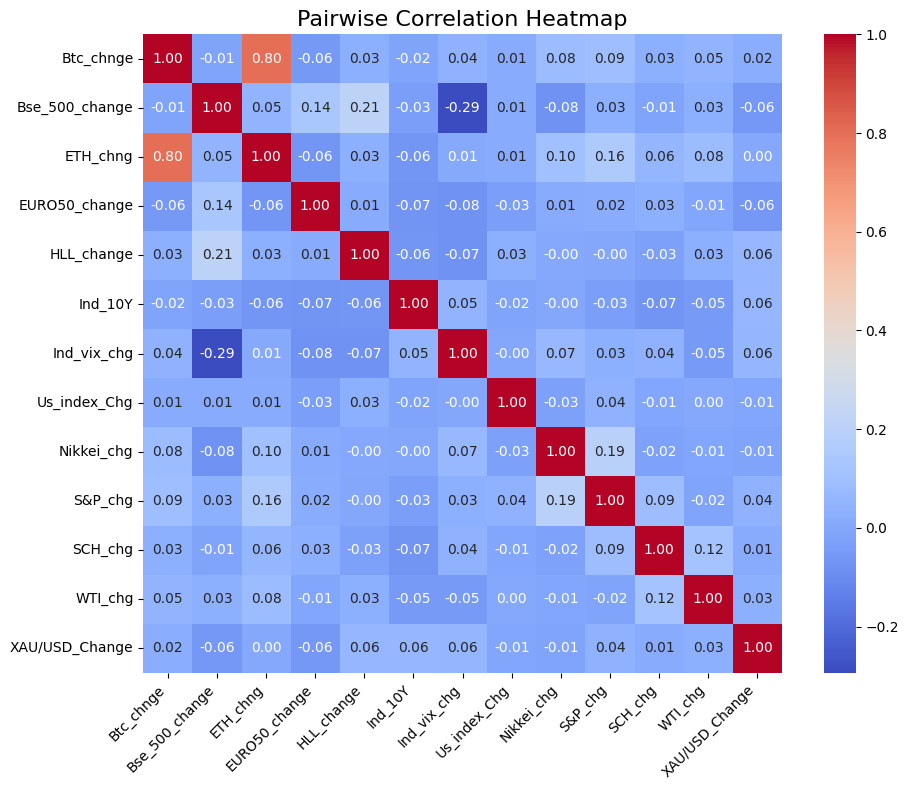

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# drop Date and compute correlation matrix
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True,        # show numbers
            fmt=".2f",         # format numbers
            cmap="coolwarm",   # red/blue color scheme
            cbar=True, 
            square=True)

plt.title("Pairwise Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


BTC and ETH: very strong positive correlation (~0.80). No surprise, crypto assets tend to move together.

Most equity indices (BSE, S&P, Nikkei, Euro50, US index, SCH): correlations with each other are small (0.1–0.2 at best). In your daily-change data, they’re not tightly coupled. They often move broadly in the same direction long-term, but daily noise washes that out.

BSE vs India VIX: negative correlation (~–0.29). That makes sense: when volatility rises, equities usually drop.

Other assets (Gold, Oil, 10Y yields, HLL): basically flat correlations with everyone else (hovering near 0). They move independently on a daily-change basis.

Diagonal = 1.0: that’s just self-correlation, always perfect.

So the story here is:

Crypto moves as one block.

Indian market vs volatility index shows the expected inverse relationship.

Global equities don’t line up super tightly day-to-day, at least not in this dataset.

Commodities and yields are doing their own thing.

If you’re prepping for PCA, this result hints that BTC & ETH will collapse into the same component, and BSE vs VIX will also push onto opposite sides of a component. The rest will each bring more independent variance.

## Instead of all variables, plot only the pairs that showed high correlation in the heatmap 

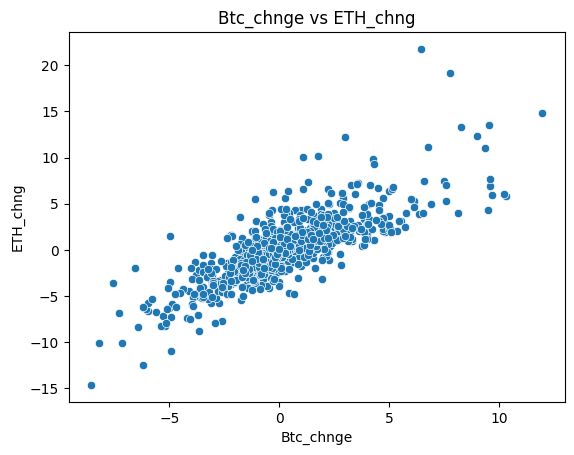

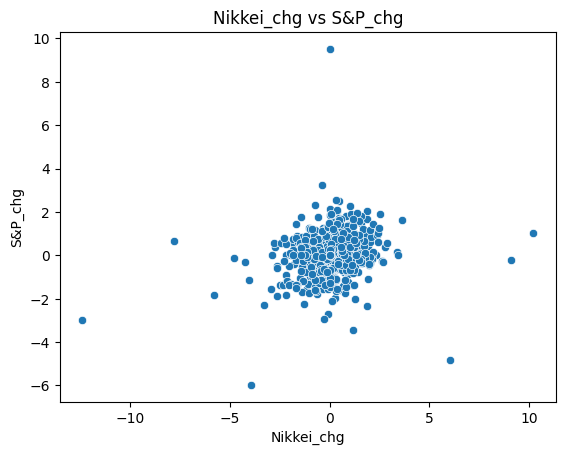

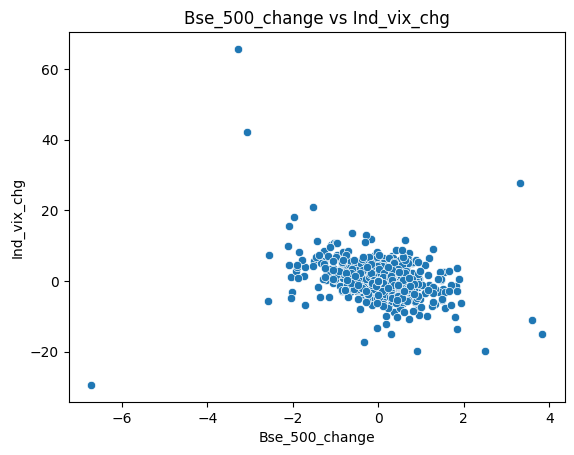

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# pick only a few strong relationships
pairs = [
    ("Btc_chnge", "ETH_chng"),
    ("Nikkei_chg", "S&P_chg"),
    ("Bse_500_change", "Ind_vix_chg")
]

for x, y in pairs:
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f"{x} vs {y}")
    plt.show()


## 1 
The plot shows a strong positive correlation between the daily percentage change in Bitcoin (Btc_chnge) and the daily percentage change in Ethereum (ETH_chnge).

This means that when the price of Bitcoin goes up, the price of Ethereum also tends to go up. Similarly, when the price of Bitcoin goes down, the price of Ethereum tends to go down as well. The points on the plot generally follow an upward trend from the bottom left to the top right, which confirms this relationship.

## 2
The plot shows a weak positive correlation between the daily percentage change in the Nikkei (Nikkei_chg) and the daily percentage change in the S&P 500 (S&P_chg).

The data points are scattered and do not follow a clear, tight linear pattern. While there is a slight tendency for both indices to move in the same direction, the relationship is not strong. This suggests that while there may be some shared global market factors, the two indices are largely influenced by their own respective domestic economic conditions. The presence of several outliers (points far from the main cluster) also indicates that there are times when one index experiences a significant change while the other does not.

## 3 
The plot displays a weak negative correlation between the daily percentage change in the BSE 500 index and the daily percentage change in the India VIX.

Negative Correlation: When the BSE 500 index experiences a positive change (moves to the right on the x-axis), the India VIX tends to have a negative or near-zero change (moves down on the y-axis). Conversely, when the BSE 500 has a negative change (moves left), the India VIX tends to have a positive or near-zero change (moves up).

Weak Relationship: The data points are widely scattered, particularly for larger changes. While there's a general downward trend, it is not a tight, linear relationship. This indicates that while there is an inverse relationship between the two, a change in the BSE 500 index is not a strong predictor of the magnitude of the change in the India VIX.

Outliers: There are several data points that lie far from the main cluster, indicating rare instances of extreme market behavior where a large change in one index is not matched by an equally large and inverse change in the other.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df.fillna(0)   # make sure no NaN
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]
print(vif_data)


           feature       VIF
0        Btc_chnge  2.799619
1   Bse_500_change  1.173071
2         ETH_chng  2.882299
3    EURO50_change  1.038083
4       HLL_change  1.058552
5          Ind_10Y  1.026554
6      Ind_vix_chg  1.109255
7     Us_index_Chg  1.005972
8       Nikkei_chg  1.061450
9          S&P_chg  1.081257
10         SCH_chg  1.035395
11         WTI_chg  1.028395
12  XAU/USD_Change  1.020007


VIF and Multicollinearity
The Variance Inflation Factor (VIF) is a measure used in regression analysis to assess the severity of multicollinearity. Multicollinearity occurs when two or more independent variables (features) in a regression model are highly correlated with each other.

A VIF value of 1 means there is no correlation between the feature and the other features.

A VIF value between 1 and 5 is generally considered to be low and acceptable, indicating low correlation.

A VIF value greater than 5 is often considered a sign of high multicollinearity, which can be problematic for a regression model.

Looking at the VIF values in the table, all features except for two have VIF values very close to 1, indicating a very low degree of correlation among them. This means that these variables are largely independent of each other.

The two features that stand out are:

Btc_chnge (Bitcoin change) with a VIF of 2.799619

ETH_chnge (Ethereum change) with a VIF of 2.882299

These values are higher than the others, but they are still well below the common threshold of 5. This suggests that while there is some correlation between the daily percentage changes of Bitcoin and Ethereum, it is not high enough to be considered a major issue for multicollinearity in a regression model. This makes sense as both cryptocurrencies often move in the same direction.


# Eigen values and Vector 

In [ ]:
import pandas as pd
import numpy as np

# Compute covariance matrix
cov_matrix = np.cov(df.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Compute variance explained
variance_explained = eigenvalues / eigenvalues.sum()

# Create a readable DataFrame
pc_table = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalue': eigenvalues,
    'Variance Explained': variance_explained
})

#show top few components 
pc_table = pc_table.round(4)

print(pc_table)



   Principal Component  Eigenvalue  Variance Explained
0                  PC1     23.0514              0.4772
1                  PC2     15.5185              0.3212
2                  PC3      2.6840              0.0556
3                  PC4      1.6342              0.0338
4                  PC5      1.4104              0.0292
5                  PC6      0.9238              0.0191
6                  PC7      0.7332              0.0152
7                  PC8      0.6878              0.0142
8                  PC9      0.6037              0.0125
9                 PC10      0.5798              0.0120
10                PC11      0.3913              0.0081
11                PC12      0.0757              0.0016
12                PC13      0.0162              0.0003


## scree plot for optimal number fo compnents 

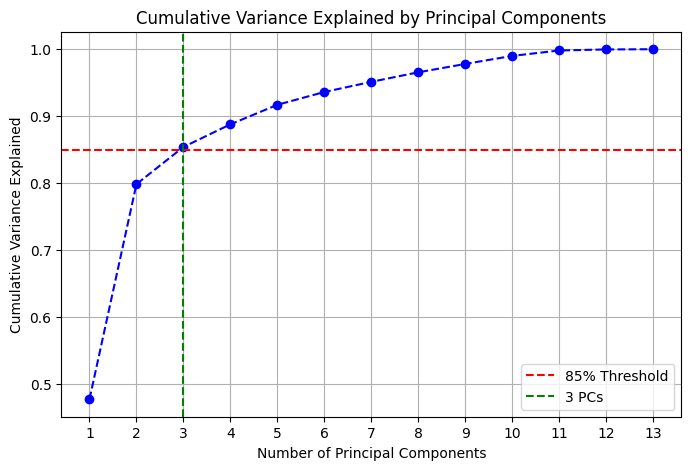

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# eigenvalues
eigenvalues = np.array([23.0514, 15.5185, 2.6840, 1.6342, 1.4104,
                        0.9238, 0.7332, 0.6878, 0.6037, 0.5798,
                        0.3913, 0.0757, 0.0162])

# Compute variance explained
variance_explained = eigenvalues / eigenvalues.sum()
cumulative_variance = np.cumsum(variance_explained)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(eigenvalues)+1))
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Threshold')
plt.axvline(x=3, color='g', linestyle='--', label='3 PCs')
plt.legend()
plt.grid(True)
plt.show()


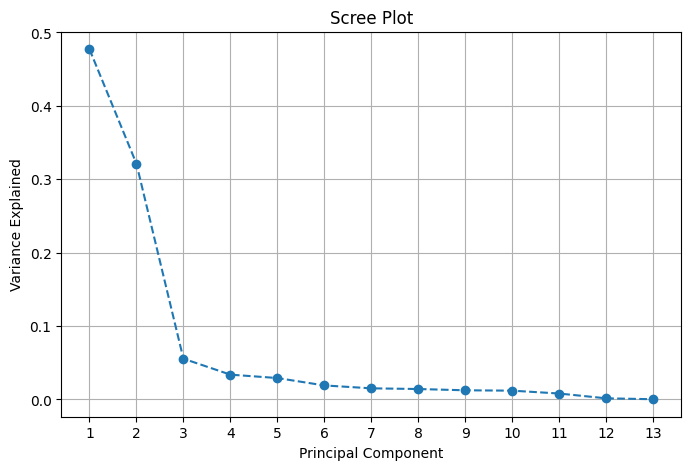

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(df)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.show()


Principal Component 1 (PC1): This component explains the most variance, approximately 47%. It represents the primary underlying factor in your data.

Principal Component 2 (PC2): This component explains about 32% of the variance, a significant drop from PC1 but still substantial.

The "Elbow" Point: The most prominent elbow in this plot occurs after the second principal component. The variance explained drops sharply from PC2 to PC3 (from ~32% to ~5%) and then continues to decline gradually.

In [ ]:
from sklearn.decomposition import PCA

# Number of components
n_components = 3

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA and transform data
X_pca = pca.fit_transform(df)

# Create a DataFrame with the 3 PCs
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Optional: check results
print(df_pca.head())

# Variance explained by these 3 PCs
print("Variance explained by each PC:", pca.explained_variance_ratio_)
print("Cumulative variance explained:", sum(pca.explained_variance_ratio_))


        PC1       PC2       PC3
0 -0.073288  0.632443 -0.050457
1 -2.207229  0.170398  1.864695
2 -9.171992 -3.775903 -0.497894
3 -3.004347 -2.861809 -2.191452
4  2.648718 -0.431286  1.747558
Variance explained by each PC: [0.47715537 0.32122673 0.05555849]
Cumulative variance explained: 0.8539405981654052


Principal Component Analysis (PCA) was performed on the dataset comprising 13 variables to reduce dimensionality while retaining most of the variance. The analysis identified three principal components (PCs) that together account for approximately 85% of the total variance.

PC1 captures the largest portion of variance (47.7%), representing the dominant pattern across the original variables. PC2, orthogonal to PC1, accounts for 32.1% of the variance, reflecting secondary variation not explained by the first component. PC3 contributes an additional 5.6% of the variance, capturing minor but meaningful variation. The remaining components each contribute less than 4%, indicating that they mainly represent residual noise rather than significant structural information.

By projecting the data onto these three principal components, the dataset is effectively reduced from 13 dimensions to 3, retaining the majority of its inherent information. This dimensionality reduction simplifies subsequent analyses and visualizations, while preserving the key patterns and relationships present in the original data.